In [13]:
!pip install tensorflow keras emnist matplotlib
!pip install tensorflow-datasets



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow_datasets-4.9.7-py3-none-any.whl.metadata (9.6 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached dm_tree-0.1.9-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached immutabledict-4.2.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached simple_parsing-0.1.7-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.16.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached etils-1.12.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
  Using cached googleapis_common_protos-1.68.0-py2.py3-none-any.whl.metadata (5.1 kB)
Using cached tensorflow_datasets-4.9.7-py3-none-any.whl (5.3 MB)
Using cached etils-1.12.0-py3-none-any.whl (166 kB)
Using cached click-8.1.8-py3-none-any.whl (98 k

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load EMNIST 'letters' dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Preprocess function
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, -1)
    label = label - 1
    return image, tf.one_hot(label, depth=26)

# Apply preprocessing
ds_train = ds_train.map(preprocess).cache().shuffle(10000).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)

# Build optimized CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
history = model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
    callbacks=[early_stop, reduce_lr]
)

# Save the trained model
model.save('emnist_letter_cnn_tuned.keras')
print("✅ Tuned Model saved as emnist_letter_cnn_tuned.keras")




Epoch 1/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 70s 96ms/step - accuracy: 0.5864 - loss: 1.8074 - val_accuracy: 0.8471 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 2/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step - accuracy: 0.8607 - loss: 0.7130 - val_accuracy: 0.8966 - val_loss: 0.5172 - learning_rate: 0.0010
Epoch 3/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 63s 91ms/step - accuracy: 0.8875 - loss: 0.5607 - val_accuracy: 0.9119 - val_loss: 0.4524 - learning_rate: 0.0010
Epoch 4/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step - accuracy: 0.8973 - loss: 0.5019 - val_accuracy: 0.9178 - val_loss: 0.4157 - learning_rate: 0.0010
Epoch 5/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 64s 93ms/step - accuracy: 0.9019 - loss: 0.4752 - val_accuracy: 0.9120 - val_loss: 0.4266 - learning_rate: 0.0010
Epoch 6/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.9069 - loss: 0.4651 - val_accuracy: 0.9124 - val_loss: 0.4301 - learning_rate: 0.0010
Epoch 7/50
694/694 ━━━━━━━━━━━━━━━━━━━━ 64s 93ms/step - accuracy: 0.9080 - l

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 732,624 (2.79 MB)

 Trainable params: 244,058 (953.35 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 488,118 (1.86 MB)

Final Training Accuracy: 95.12%
Final Validation Accuracy: 93.89%


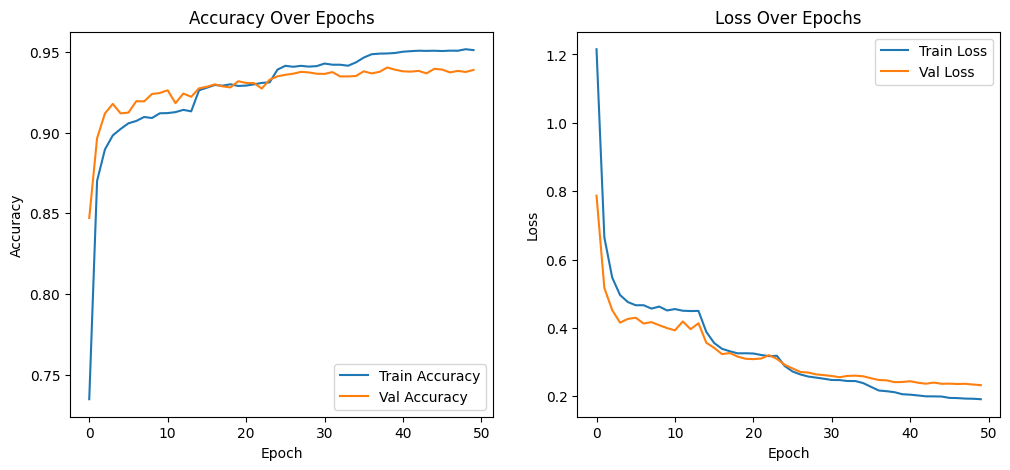

In [11]:
# Plot accuracy and loss
model.summary()
final_accuracy = history.history['accuracy'][-1]
val_final_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {val_final_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
